<a href="https://colab.research.google.com/github/Sampath-Varma/Sampath_INFO5731_Fall2024/blob/main/Byrraju_Sampath_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [2]:
import pandas as pd
from collections import Counter
import re

In [3]:
# Load the dataset
data = pd.read_csv('imdb_reviews.csv')
reviews = data['Review']

In [4]:
# Function to tokenize text
def tokenize(text):
    return re.findall(r'\w+', text.lower())

In [5]:
# Part 1: Count Trigram, Bigram, and Unigram Frequencies
trigram_counts = Counter()
bigram_counts = Counter()
unigram_counts = Counter()

for review in reviews:
    tokens = tokenize(review)
    unigrams = tokens
    bigrams = zip(tokens, tokens[1:])
    trigrams = zip(tokens, tokens[1:], tokens[2:])

    unigram_counts.update(unigrams)
    bigram_counts.update(bigrams)
    trigram_counts.update(trigrams)

In [6]:
# Display top 10 trigrams
top_10_trigrams = trigram_counts.most_common(10)
print("Top 10 Trigrams:")
for trigram, count in top_10_trigrams:
    print(f"'{trigram[0]} {trigram[1]} {trigram[2]}': {count}")

Top 10 Trigrams:
'dune part two': 299
'one of the': 218
'dune part 2': 185
'it s a': 154
'part two is': 140
'the first movie': 125
'of the movie': 118
'i don t': 116
'this movie is': 112
'of the film': 110


In [7]:
# Display top 10 bigrams
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"'{bigram[0]} {bigram[1]}': {count}")


Top 10 Bigrams:
'of the': 1825
'in the': 975
'to the': 710
'it s': 686
'the first': 633
'and the': 628
'dune part': 609
'the movie': 590
'this movie': 572
'the film': 564


In [8]:
# Display top 10 unigrams
top_10_unigrams = unigram_counts.most_common(10)
print("\nTop 10 Unigrams:")
for unigram, count in top_10_unigrams:
    print(f"'{unigram}': {count}")


Top 10 Unigrams:
'the': 14856
'and': 6871
'of': 5705
'a': 5370
'to': 5018
'i': 3979
'is': 3902
'it': 3854
'in': 3331
'this': 2688


In [9]:
# Part 2: Calculate Bigram Probabilities
bigram_probabilities = []
for (w1, w2), count in bigram_counts.items():
    if unigram_counts[w1] > 0:
        probability = count / unigram_counts[w1]
        bigram_probabilities.append(((w1, w2), probability))

In [10]:
# Sort by probability and display as DataFrame
bigram_probabilities_sorted = sorted(bigram_probabilities, key=lambda x: x[1], reverse=True)[:100]
bigram_probs_df = pd.DataFrame([(f"{w1} {w2}", prob) for (w1, w2), prob in bigram_probabilities_sorted],
                               columns=["word", "probability"])

In [11]:
# Display top 100 bigram probabilities
print("\nTop 100 Bigram Probabilities:")
print(bigram_probs_df)


Top 100 Bigram Probabilities:
                  word  probability
0      interpreted the          1.0
1      technologies of          1.0
2       overbearing at          1.0
3     sentiments about          1.0
4           slows down          1.0
..                 ...          ...
95    gunships entered          1.0
96      sardurkar were          1.0
97          debris and          1.0
98       preparing for          1.0
99  oncoming onslaught          1.0

[100 rows x 2 columns]


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [12]:
import pandas as pd
import math
import re
from collections import Counter

In [13]:
# Load data from file
file_path = '/content/imdb_reviews.csv'
df = pd.read_csv(file_path, usecols=[1], header=None, names=['Review'])
documents = df['Review'].tolist()

In [14]:
# Function to clean and tokenize text
def tokenize_review(text):
    lower_text = text.lower()
    cleaned_text = re.sub(r'[^a-z\s]', '', lower_text)
    return cleaned_text.split()

tokenized_reviews = [tokenize_review(review) for review in documents]

In [15]:
# Calculate Term Frequency (TF)
def compute_tf(words):
    word_count = Counter(words)
    total_words = len(words)
    return {word: freq / total_words for word, freq in word_count.items()}

tf_scores = [compute_tf(words) for words in tokenized_reviews]

In [16]:
# Calculate Inverse Document Frequency (IDF)
def compute_idf(tokenized_docs):
    num_docs = len(tokenized_docs)
    idf_values = {}
    all_terms = set(term for doc in tokenized_docs for term in doc)

    for term in all_terms:
        doc_count = sum(1 for doc in tokenized_docs if term in doc)
        idf_values[term] = math.log(num_docs / (1 + doc_count))

    return idf_values

idf_values = compute_idf(tokenized_reviews)

In [17]:
# Create TF-IDF matrix
tfidf_values = []
for tf in tf_scores:
    tfidf_vector = {term: tf[term] * idf_values[term] for term in tf}
    tfidf_values.append(tfidf_vector)

In [18]:
# Function to calculate cosine similarity
def cosine_sim(vec1, vec2):
    dot_prod = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in vec2)

    mag_vec1 = math.sqrt(sum(value ** 2 for value in vec1.values()))
    mag_vec2 = math.sqrt(sum(value ** 2 for value in vec2.values()))

    if mag_vec1 == 0 or mag_vec2 == 0:
        return 0

    return dot_prod / (mag_vec1 * mag_vec2)

In [19]:
# Process search query
search_text = "An Outstanding movie with a haunting performance and best character development"
query_terms = tokenize_review(search_text)

query_tf = compute_tf(query_terms)
query_tfidf = {term: query_tf.get(term, 0) * idf_values.get(term, 0) for term in idf_values.keys()}

In [20]:
# Compute similarity scores
similarities = [cosine_sim(tfidf_vector, query_tfidf) for tfidf_vector in tfidf_values]

# Rank documents by similarity
ranked_reviews = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)

In [21]:
print("Documents Ranked by Similarity to Query:")
for idx, sim_score in ranked_reviews:
    print(f"Document {idx + 1} (Score: {sim_score:.4f}): {documents[idx]}")

Documents Ranked by Similarity to Query:
Document 303 (Score: 0.1492): Dune Part Two is an outstanding sequel that greatly outshines Dune Part One in every single way. This film is definitely made to be seen in the cinema as the outstanding visuals translate amazingly onto the big screen. The music of this film is absolutely amazing and in my opinion it's one of the best soundtracks ever made. The story is gripping as it is fascinating and fantastic to see the rise of Paul Atreides . This film series seems to definitely be the Lord Of The Rings of the 2020s and it will be praised for generations. Overall a perfect film that I hope will preform well in awards season.
Document 461 (Score: 0.1319): I actually enjoyed Part I more than this. One hour in, I had to check the time. There's only so much time that can be spent on explaining that Charlamee is the savior.The bright spot was definitely Javier Bardem, great performance for an otherwise banal cast of actors. Don't get me wrong, the v

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [29]:
import nltk
import pandas as pd
import re
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
# Load your text data
file_path = '/content/imdb_reviews.csv'
data = pd.read_csv(file_path)
texts = data['Review'].tolist()

In [31]:
# Preprocessing and tokenization
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    return tokens

In [32]:
# Tokenize all documents
tokenized_corpus = [preprocess_text(doc) for doc in texts]

In [33]:
# Train a Word2Vec model
embedding_size = 300
model = Word2Vec(sentences=tokenized_corpus, vector_size=embedding_size, window=5, min_count=2, sg=1, workers=4)

In [41]:
# Extract word vectors for visualization
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

In [35]:
# Reduce dimensionality to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=3000)
word_vecs_2d = tsne.fit_transform(word_vectors)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


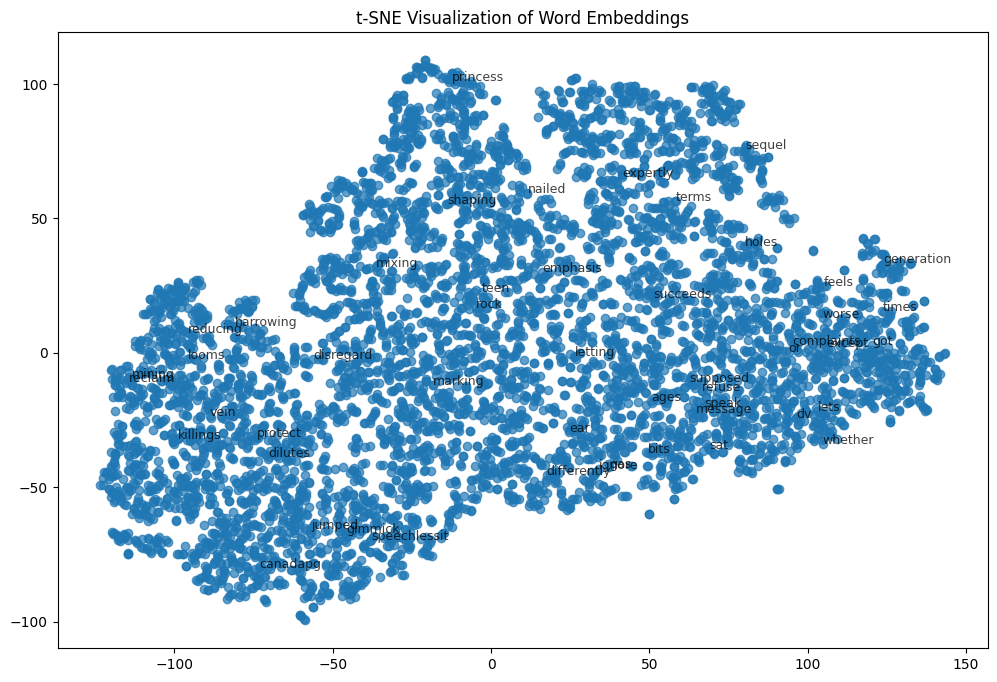

In [48]:
import random
random.seed(42)

num_labels = 50
random_indices = random.sample(range(len(words)), num_labels)
sampled_words = [words[i] for i in random_indices]

plt.figure(figsize=(12, 8))
plt.scatter(word_vecs_2d[:, 0], word_vecs_2d[:, 1], alpha=0.7)

for i, word in enumerate(words):
    if word in sampled_words:
        plt.annotate(word, (word_vecs_2d[i, 0], word_vecs_2d[i, 1]), fontsize=9, alpha=0.75)

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [53]:
# The GitHub link of your final csv file


# Link: https://github.com/Sampath-Varma/Sampath_INFO5731_Fall2024/blob/main/annotated_imdb_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [52]:
# Type your answer
'''
I learnt a lot during this assignment but i found question 1 a bit challenging where we have to calucalte the probabilities of bigrams and also the relative probabilities.
Other than that i found the assignment not that challenging.

'''

'\nI learnt a lot during this assignment but i found question 1 a bit challenging where we have to calucalte the probabilities of bigrams and also the relative probabilities. \nOther than that i found the assignment not that challenging.\n\n'